In [1]:
import numpy as np
from matplotlib import pyplot as plt
from TOF import VENUS_chopper
%matplotlib inline

In [2]:
Pulse_frequency=60.
pulse_width=0
delay=0
sourceTodetector=25.
chopper_rotational_frequency=30.
minimum_wavelength=1
distance_T3chopper_fr_source=9.5
distance_T2chopper_fr_source=7.8
distance_T1chopper_fr_source=5.7


param=(Pulse_frequency,pulse_width,delay,sourceTodetector,chopper_rotational_frequency, minimum_wavelength, distance_T3chopper_fr_source, distance_T1chopper_fr_source, distance_T2chopper_fr_source)

In [3]:
chp1=VENUS_chopper(*param)

In [4]:
bandwidth = chp1.Wavelength_width(sourceTodetector, chopper_rotational_frequency)


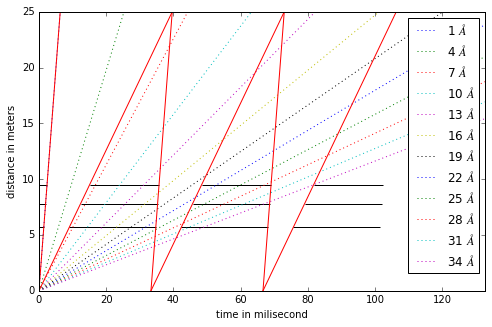

In [5]:
distance=np.arange(0,25,0.1)
wavelength=[minimum_wavelength, minimum_wavelength+bandwidth]


chopper_distance=np.array([distance_T1chopper_fr_source, distance_T2chopper_fr_source, distance_T3chopper_fr_source])

Pulse_frequency
plt.figure(figsize=(8,5))

wavelengths2=np.arange(minimum_wavelength,35,3)
# lighthouse lines
[plt.plot(chp1.tof(distance,i), distance, ':', label="%s $\AA$" % i) for i in wavelengths2]

npulse = 3
pulses = range(npulse)
pulse_period = 1000./chopper_rotational_frequency
# lighthouse lines
for pulse in pulses:
    [plt.plot(chp1.tof(distance,i)+pulse*pulse_period,  distance, 'r') for i in wavelength]

# horizontal lines
[
    [plt.hlines(i, chp1.time_delay_before_chopper_opens(i)+chp1.openning_time_duration(i,chopper_rotational_frequency)+(pulse-1)*pulse_period, chp1.time_delay_before_chopper_opens(i)+(pulse)*pulse_period, 
                colors='k', linestyles='solid')
     for i in chopper_distance]
    for pulse in range(npulse+1)
]

plt.xlabel('time in milisecond')
plt.ylabel('distance in meters')
plt.xlim(0,chp1.tof(sourceTodetector,21))
plt.legend()
plt.show()